<a href="https://colab.research.google.com/github/Jorgedavid91/ml_project/blob/dev/ML_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github

In [1]:
!apt-get install -y git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


Cloning into 'ml_project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [164]:
import pandas as pd
import numpy as np

Levantamos el dataset original

In [220]:
df = pd.read_csv('/content/drive/MyDrive/dataset/ml_final_project/COVID19MEXICO.csv',header='infer')

Primer mapeo general del dataset

In [227]:
#print(df.info())
df["EDAD"].describe()
percentil_25 = df['EDAD'].quantile(0.25)
mediana = df['EDAD'].quantile(0.50)
percentil_75 = df['EDAD'].quantile(0.75)
percentil_99 = df['EDAD'].quantile(0.99)

print(f'Percentil 25: {percentil_25}')
print(f'Mediana (Percentil 50): {mediana}')
print(f'Percentil 75: {percentil_75}')
print(f'Percentil 99: {percentil_99}')

Percentil 25: 25.0
Mediana (Percentil 50): 37.0
Percentil 75: 51.0
Percentil 99: 86.0


In [228]:
df["EDAD"].describe()

count    1.137999e+06
mean     3.837160e+01
std      1.945812e+01
min      0.000000e+00
25%      2.500000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.540000e+02
Name: EDAD, dtype: float64

In [167]:
clasificacion_final = [['1','1 - CONFIRMADO - ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA'],['2','2 - CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN'],['3','3 - CONFIRMADO POR LABORATORIO'],['4','4 - INVÁLIDO POR LABORATORIO'],['5','5 - NO REALIZADO POR LABORATORIO'],['6','6 - CASO SOSPECHOSO'],['7','7 - NEGATIVO']]
pd.set_option('display.max_columns', None)
clas_final_df = pd.DataFrame(clasificacion_final, columns=['CLASIFICACION_FINAL', 'clasificacion_descrip'])
clas_final_df = clas_final_df.astype({'CLASIFICACION_FINAL': int, 'clasificacion_descrip': str})
print(clas_final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CLASIFICACION_FINAL    7 non-null      int64 
 1   clasificacion_descrip  7 non-null      object
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None


In [222]:
print((df['EDAD'] > 100).sum())

286


In [168]:
#Agregamos un campo calculado llamado FALLECIDO, que será nuestra variable dependiente (a predecir)
df['FALLECIDO'] = np.where(df['FECHA_DEF'] != '9999-99-99', 'SI', 'NO')

#Agregamos un campo llamado clasificacion_descrip para identificar con mayor facilidad los tipos de diagnósticos
df3 = pd.merge(
    df,
    clas_final_df,
    how="inner",
    on='CLASIFICACION_FINAL',
)

#print(df3.head())
print(df3.groupby(['clasificacion_descrip','FALLECIDO'])['ID_REGISTRO'].nunique())

clasificacion_descrip                               FALLECIDO
1 - CONFIRMADO - ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA  NO             7941
                                                    SI               21
2 - CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN         NO               14
                                                    SI               14
3 - CONFIRMADO POR LABORATORIO                      NO           407525
                                                    SI             2748
4 - INVÁLIDO POR LABORATORIO                        NO              125
5 - NO REALIZADO POR LABORATORIO                    NO             1546
                                                    SI               30
6 - CASO SOSPECHOSO                                 NO            48923
                                                    SI              152
7 - NEGATIVO                                        NO           664368
                                                    SI             4592
Na

In [169]:
#!pip install pandas-profiling
#from ydata_profiling import ProfileReport

In [170]:
#prof = ProfileReport(df3)
#prof.to_file(output_file='output.html')

In [171]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137999 entries, 0 to 1137998
Data columns (total 42 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   FECHA_ACTUALIZACION    1137999 non-null  object
 1   ID_REGISTRO            1137999 non-null  object
 2   ORIGEN                 1137999 non-null  int64 
 3   SECTOR                 1137999 non-null  int64 
 4   ENTIDAD_UM             1137999 non-null  int64 
 5   SEXO                   1137999 non-null  int64 
 6   ENTIDAD_NAC            1137999 non-null  int64 
 7   ENTIDAD_RES            1137999 non-null  int64 
 8   MUNICIPIO_RES          1137999 non-null  int64 
 9   TIPO_PACIENTE          1137999 non-null  int64 
 10  FECHA_INGRESO          1137999 non-null  object
 11  FECHA_SINTOMAS         1137999 non-null  object
 12  FECHA_DEF              1137999 non-null  object
 13  INTUBADO               1137999 non-null  int64 
 14  NEUMONIA               1137999 non

In [172]:
df_seleccion_1 = df3[['SEXO', 'FECHA_SINTOMAS', 'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'CLASIFICACION_FINAL', 'UCI', 'FALLECIDO']]
df_seleccion_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137999 entries, 0 to 1137998
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   SEXO                 1137999 non-null  int64 
 1   FECHA_SINTOMAS       1137999 non-null  object
 2   INTUBADO             1137999 non-null  int64 
 3   NEUMONIA             1137999 non-null  int64 
 4   EDAD                 1137999 non-null  int64 
 5   EMBARAZO             1137999 non-null  int64 
 6   DIABETES             1137999 non-null  int64 
 7   EPOC                 1137999 non-null  int64 
 8   ASMA                 1137999 non-null  int64 
 9   INMUSUPR             1137999 non-null  int64 
 10  HIPERTENSION         1137999 non-null  int64 
 11  CARDIOVASCULAR       1137999 non-null  int64 
 12  OBESIDAD             1137999 non-null  int64 
 13  RENAL_CRONICA        1137999 non-null  int64 
 14  TABAQUISMO           1137999 non-null  int64 
 15  CLASIFICACION_F

In [173]:
def categorizar_si_no(valor):
  if valor in (1,"SI"):
    return 1
  elif valor in (2,"NO"):
    return 0
  else:
    return -1

Creo un dataframa llamado **df_categ** que contendrá los att categorizados de manera binaria (0 y 1)

In [174]:
df_categ = pd.DataFrame()

Función para convertir SI y NO
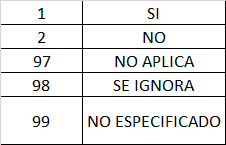



Campo SEXO
Codificación binaria:
1 --> 1 = Mujer |
2 --> 0 = Hombre

In [175]:
df_seleccion_1['SEXO'].value_counts()

1    669554
2    468445
Name: SEXO, dtype: int64

In [176]:
df_categ['SEXO'] = df_seleccion_1['SEXO'].map(categorizar_si_no)
df_categ['SEXO'].value_counts()

1    669554
0    468445
Name: SEXO, dtype: int64

Campo INTUBADO
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [223]:
df_seleccion_1['INTUBADO'].value_counts()

97    1049894
2       83901
1        3966
99        238
Name: INTUBADO, dtype: int64

In [178]:
df_categ['INTUBADO'] = df_seleccion_1['INTUBADO'].map(categorizar_si_no)
df_categ['INTUBADO'].value_counts()

-1    1050132
 0      83901
 1       3966
Name: INTUBADO, dtype: int64

Campo NEUMONIA
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [224]:
df_seleccion_1['NEUMONIA'].value_counts()

2     1099547
1       32673
99       5779
Name: NEUMONIA, dtype: int64

In [180]:
df_categ['NEUMONIA'] = df_seleccion_1['NEUMONIA'].map(categorizar_si_no)
df_categ['NEUMONIA'].value_counts()

 0    1099547
 1      32673
-1       5779
Name: NEUMONIA, dtype: int64

Campo EMBARAZO
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [181]:
df_seleccion_1['EMBARAZO'].value_counts()

2     644342
97    468445
1      19778
98      5429
99         5
Name: EMBARAZO, dtype: int64

In [182]:
df_categ['EMBARAZO'] = df_seleccion_1['EMBARAZO'].map(categorizar_si_no)
df_categ['EMBARAZO'].value_counts()

 0    644342
-1    473879
 1     19778
Name: EMBARAZO, dtype: int64

Campo DIABETES
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [183]:
df_seleccion_1['DIABETES'].value_counts()

2     1046980
1       89830
98       1189
Name: DIABETES, dtype: int64

In [184]:
df_categ['DIABETES'] = df_seleccion_1['DIABETES'].map(categorizar_si_no)
df_categ['DIABETES'].value_counts()

 0    1046980
 1      89830
-1       1189
Name: DIABETES, dtype: int64

Campo EPOC
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [185]:
df_seleccion_1['EPOC'].value_counts()

2     1125759
1       11158
98       1082
Name: EPOC, dtype: int64

In [186]:
df_categ['EPOC'] = df_seleccion_1['EPOC'].map(categorizar_si_no)
df_categ['EPOC'].value_counts()

 0    1125759
 1      11158
-1       1082
Name: EPOC, dtype: int64

Campo ASMA
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [187]:
df_seleccion_1['ASMA'].value_counts()

2     1110321
1       26640
98       1038
Name: ASMA, dtype: int64

In [188]:
df_categ['ASMA'] = df_seleccion_1['ASMA'].map(categorizar_si_no)
df_categ['ASMA'].value_counts()

 0    1110321
 1      26640
-1       1038
Name: ASMA, dtype: int64

Campo INMUSUPR
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [189]:
df_seleccion_1['INMUSUPR'].value_counts()

2     1126677
1       10311
98       1011
Name: INMUSUPR, dtype: int64

In [190]:
df_categ['INMUSUPR'] = df_seleccion_1['INMUSUPR'].map(categorizar_si_no)
df_categ['INMUSUPR'].value_counts()

 0    1126677
 1      10311
-1       1011
Name: INMUSUPR, dtype: int64

Campo HIPERTENSION
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [191]:
df_seleccion_1['HIPERTENSION'].value_counts()

2     1012018
1      124929
98       1052
Name: HIPERTENSION, dtype: int64

In [192]:
df_categ['HIPERTENSION'] = df_seleccion_1['HIPERTENSION'].map(categorizar_si_no)
df_categ['HIPERTENSION'].value_counts()

 0    1012018
 1     124929
-1       1052
Name: HIPERTENSION, dtype: int64

Campo CARDIOVASCULAR
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [193]:
df_seleccion_1['CARDIOVASCULAR'].value_counts()

2     1122370
1       14574
98       1055
Name: CARDIOVASCULAR, dtype: int64

In [194]:
df_categ['CARDIOVASCULAR'] = df_seleccion_1['CARDIOVASCULAR'].map(categorizar_si_no)
df_categ['CARDIOVASCULAR'].value_counts()

 0    1122370
 1      14574
-1       1055
Name: CARDIOVASCULAR, dtype: int64

Campo OBESIDAD
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [195]:
df_seleccion_1['OBESIDAD'].value_counts()

2     1049966
1       87077
98        956
Name: OBESIDAD, dtype: int64

In [196]:
df_categ['OBESIDAD'] = df_seleccion_1['OBESIDAD'].map(categorizar_si_no)
df_categ['OBESIDAD'].value_counts()

 0    1049966
 1      87077
-1        956
Name: OBESIDAD, dtype: int64

Campo RENAL_CRONICA
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [197]:
df_seleccion_1['RENAL_CRONICA'].value_counts()

2     1124379
1       12574
98       1046
Name: RENAL_CRONICA, dtype: int64

In [198]:
df_categ['RENAL_CRONICA'] = df_seleccion_1['RENAL_CRONICA'].map(categorizar_si_no)
df_categ['RENAL_CRONICA'].value_counts()

 0    1124379
 1      12574
-1       1046
Name: RENAL_CRONICA, dtype: int64

Campo TABAQUISMO
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [199]:
df_seleccion_1['TABAQUISMO'].value_counts()

2     1090450
1       46452
98       1097
Name: TABAQUISMO, dtype: int64

In [200]:
df_categ['TABAQUISMO'] = df_seleccion_1['TABAQUISMO'].map(categorizar_si_no)
df_categ['TABAQUISMO'].value_counts()

 0    1090450
 1      46452
-1       1097
Name: TABAQUISMO, dtype: int64

Campo UCI
Codificación binaria:
1 --> 1 Sí
2 --> 0 No

In [201]:
df_seleccion_1['UCI'].value_counts()

97    1049894
2       84725
1        3142
99        238
Name: UCI, dtype: int64

In [202]:
df_categ['UCI'] = df_seleccion_1['UCI'].map(categorizar_si_no)
df_categ['UCI'].value_counts()

-1    1050132
 0      84725
 1       3142
Name: UCI, dtype: int64

Campo FALLECIDO
Codificación binaria:
SI --> 1
NO --> 0

In [203]:
df_seleccion_1['FALLECIDO'].value_counts()

NO    1130442
SI       7557
Name: FALLECIDO, dtype: int64

In [204]:
df_categ['FALLECIDO'] = df_seleccion_1['FALLECIDO'].map(categorizar_si_no)
df_categ['FALLECIDO'].value_counts()

0    1130442
1       7557
Name: FALLECIDO, dtype: int64

Categorización finalizada

In [205]:
from sklearn.preprocessing import MinMaxScaler

In [206]:
scaler = MinMaxScaler()
df['EDAD'] = scaler.fit_transform(df[['EDAD']])


In [207]:
pd.set_option("display.max_rows", None)

In [ ]:
df_seleccion_1['EDAD'].value_counts().sort_values()

In [229]:
print((df_seleccion_1['EDAD'] > 86).sum())

10191


In [210]:
df_seleccion_1['CLASIFICACION_FINAL'].value_counts()

7    668960
3    410273
6     49075
1      7962
5      1576
4       125
2        28
Name: CLASIFICACION_FINAL, dtype: int64